# Diabetes Prediction using Machine Learning

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Objective
We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## **Details about the dataset:**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1)

**Number of Observation Units: 768**

**Variable Number: 9**

**Result; DT model archived an accuracy of 89.18% after applying forward selection using 4 out of 8 features**

# 1) Exploratory Data Analysis

In [1]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 
from imblearn.over_sampling import SMOTE 
import warnings
warnings.simplefilter(action = "ignore") 

#StratifiedKFold is a type of cross-validation, n_splits defines the number of folds (K)
kf = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)

In [2]:
#Reading the dataset
df = pd.read_csv('diabetes.csv')

In [3]:
# The first 5 observation units of the data set were accessed.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

(768, 9)

In [5]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Descriptive statistics of the data set accessed. 
# Or df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).transpose()
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [7]:
# The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [8]:
# The classes of the outcome variable were examined.
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

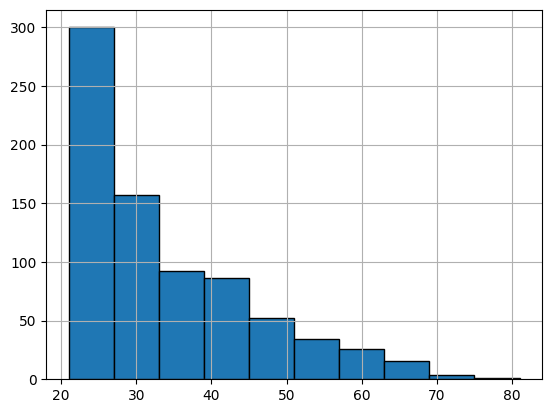

In [9]:
# The histagram of the Age variable was reached.
df["Age"].hist(edgecolor = "black");

In [10]:
print("* Max Age: " + str(df["Age"].max()) + "\n* Min Age: " + str(df["Age"].min()))

* Max Age: 81
* Min Age: 21


<AxesSubplot: xlabel='BMI', ylabel='Density'>

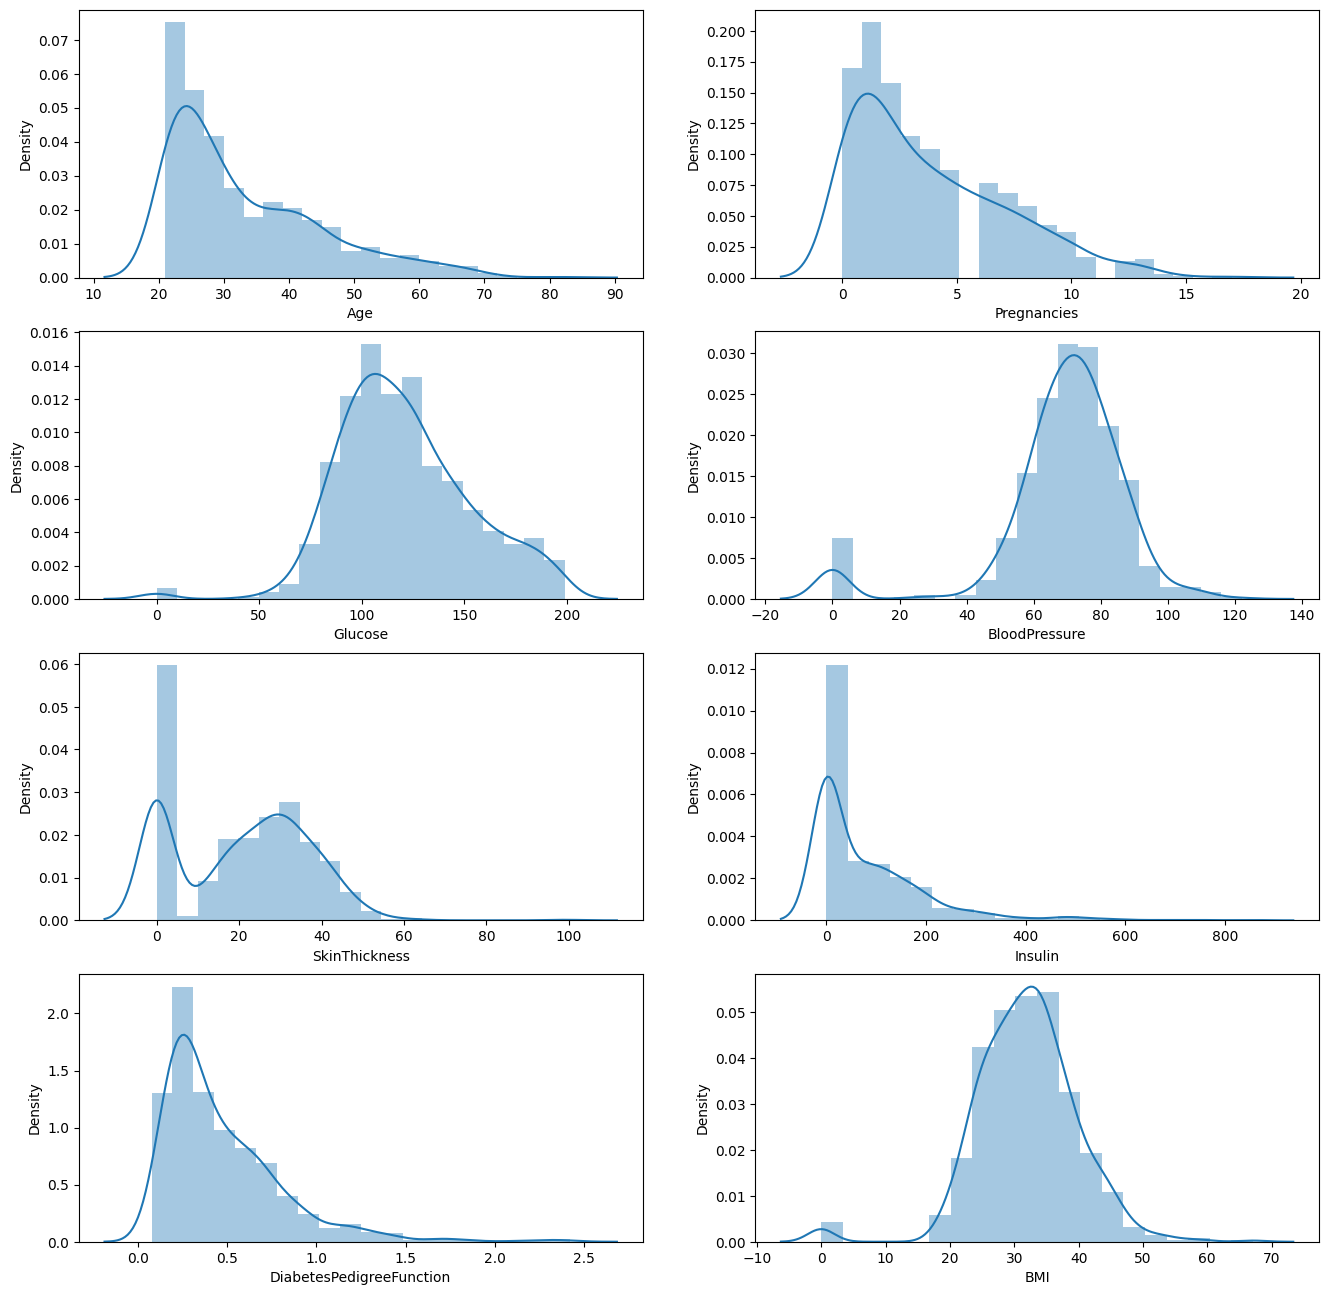

In [11]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

In [12]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [13]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [14]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [15]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [16]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [17]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [18]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [19]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


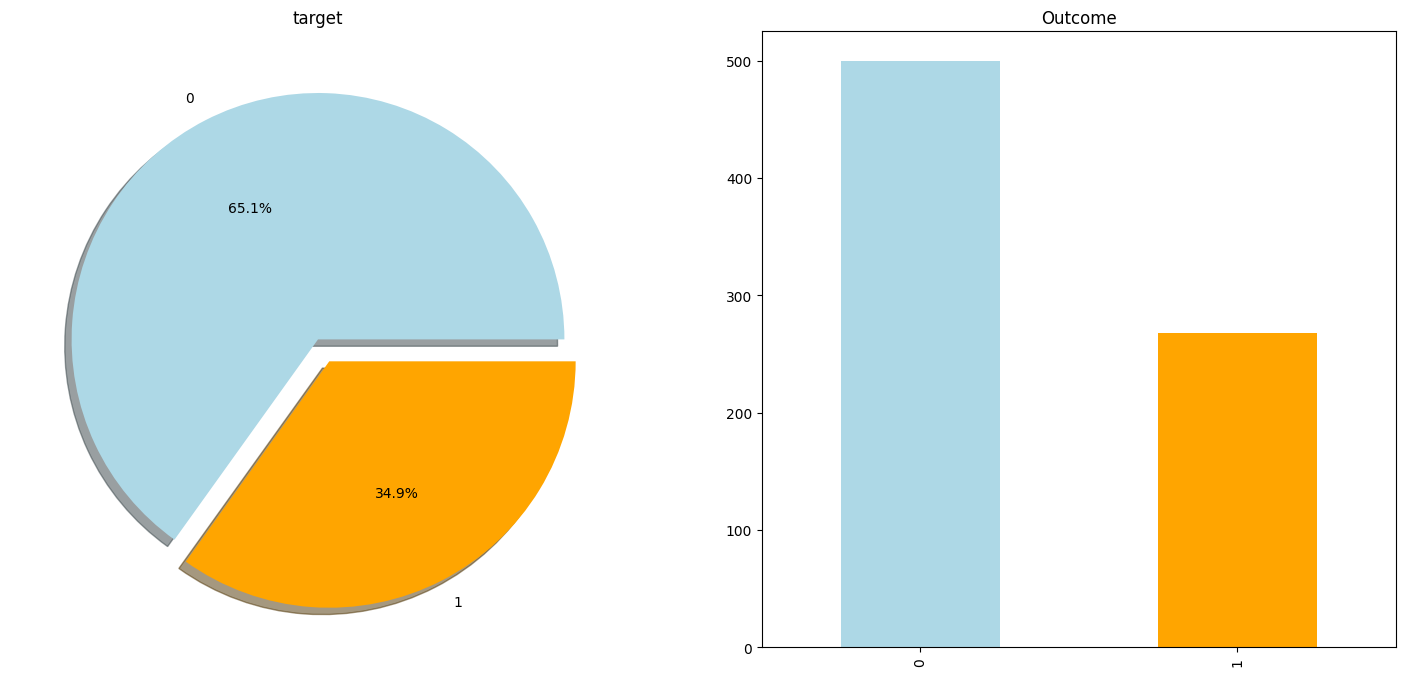

In [20]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=['lightblue', 'orange'])
ax[0].set_title('target')
ax[0].set_ylabel('')
df['Outcome'].value_counts().plot.bar(ax=ax[1], color=['lightblue', 'orange'])
ax[1].set_title('Outcome')
plt.show()

In [21]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
# These variables are Glucose. As these increase, Outcome variable increases.
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


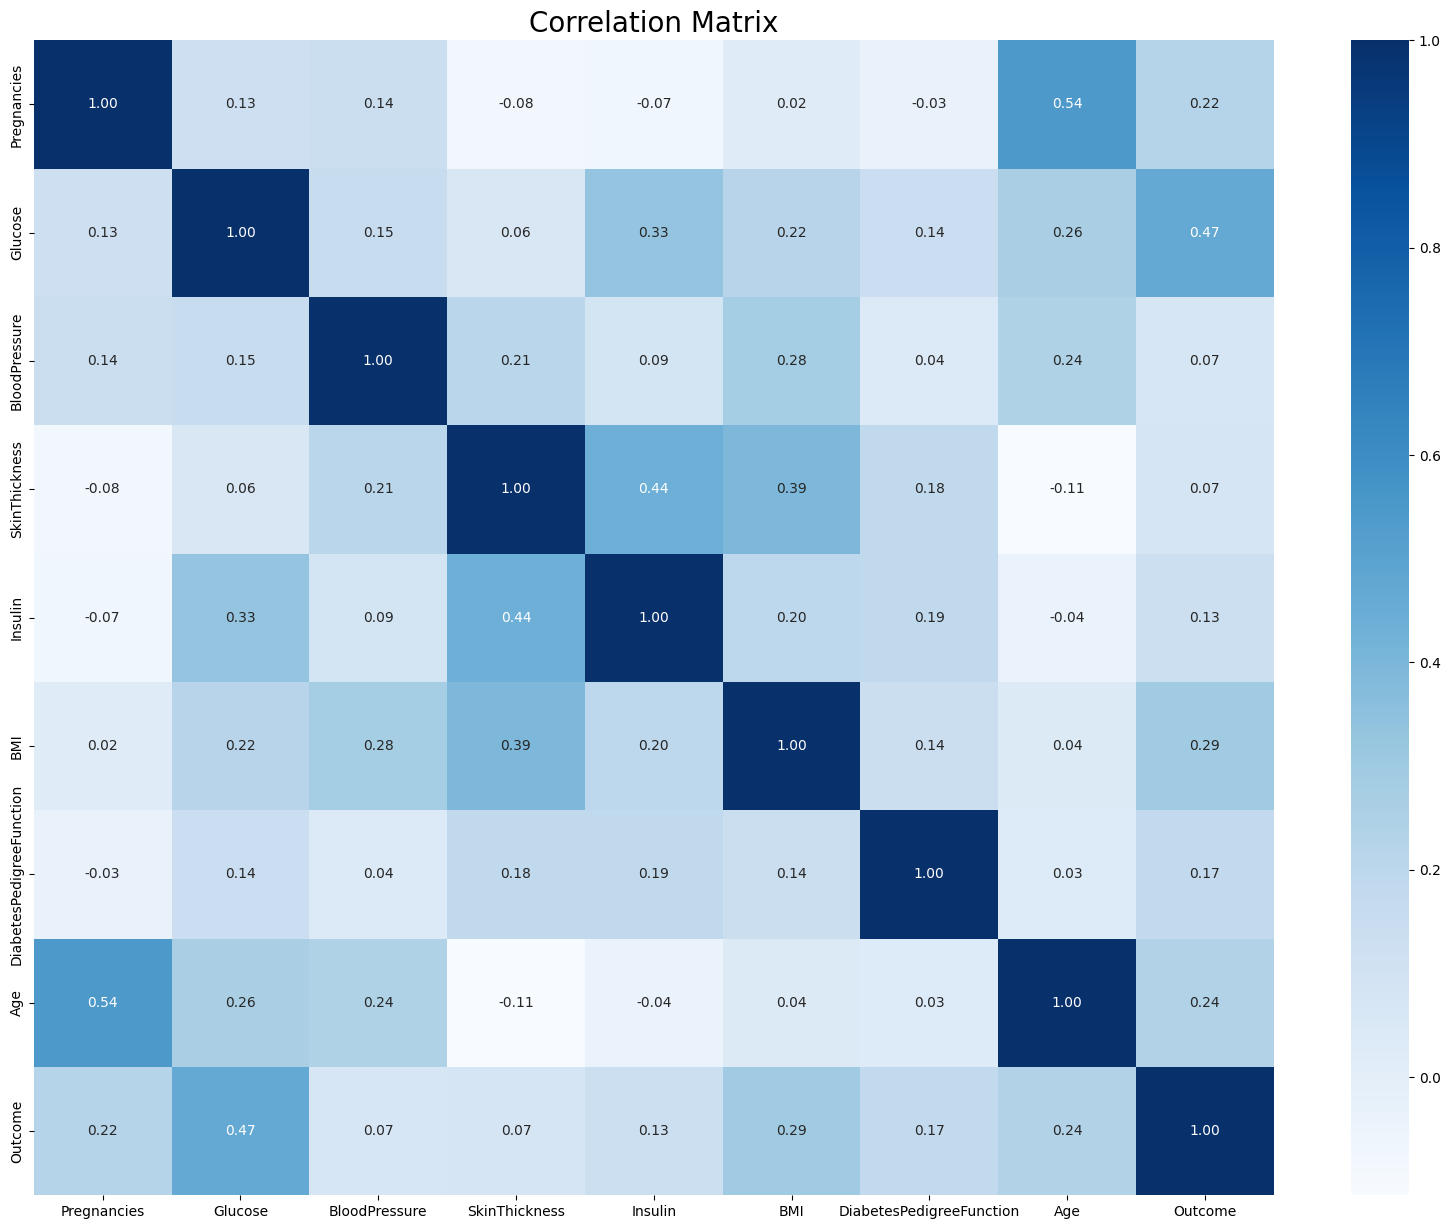

In [22]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "Blues" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# 2) Data Preprocessing

## 2.1) Missing Observation Analysis

We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:

In [23]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [25]:
# Now, we can look at where are missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

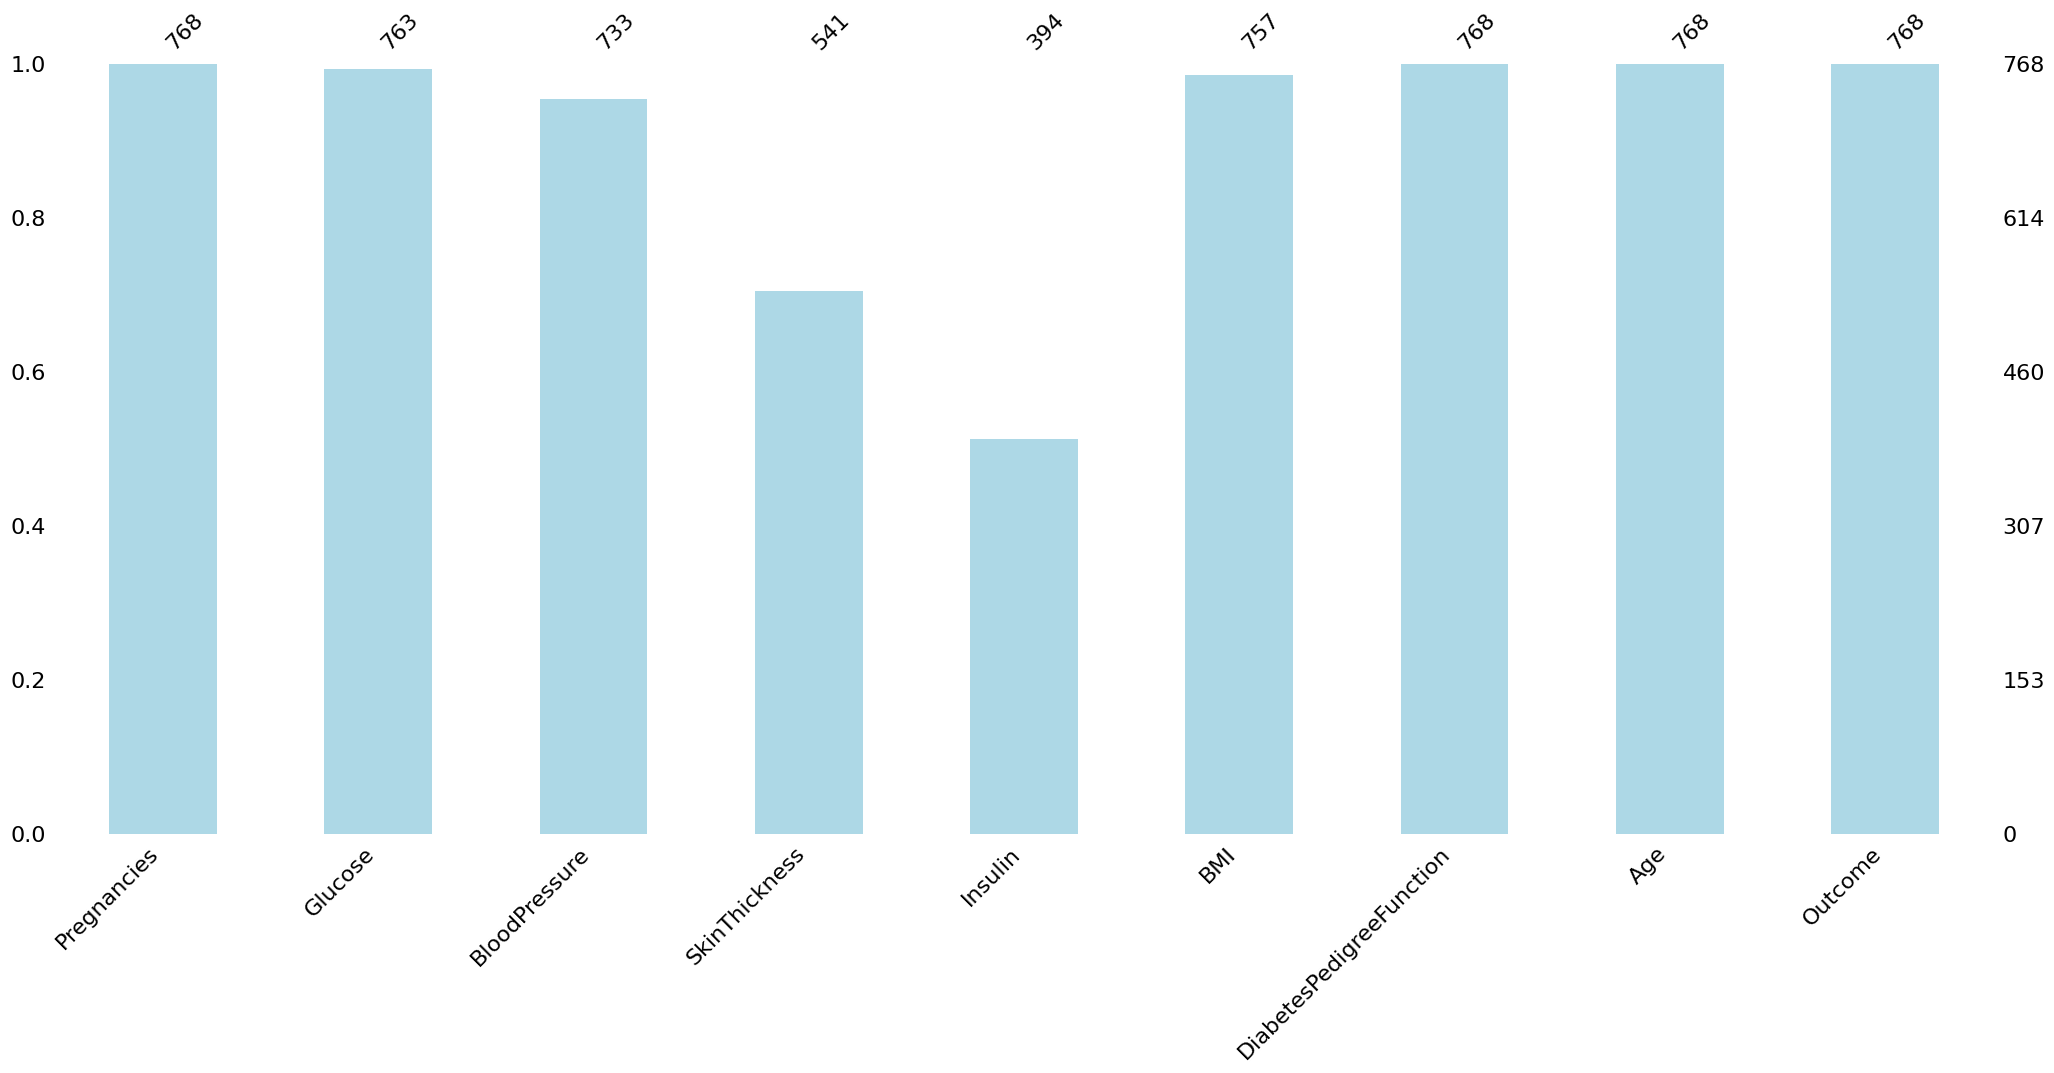

In [26]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting 
import missingno as msno
msno.bar(df, color='lightblue');

In [27]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [28]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [30]:
# Missing values were filled.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 2.2) Features Scaling

In [31]:
Y = df["Outcome"]
X = df.drop("Outcome", axis=1)

cols = X.columns
index = X.index

scaler = StandardScaler()
scaleddata = scaler.fit_transform(X) #return array

# Convert the array back to a dataframe
X=pd.DataFrame(scaleddata, columns=cols, index=index)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496


In [32]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679177,0.298449,2.128317,0.429525,0.067679,-0.908682,2.532136
764,-0.547919,0.010607,-0.197495,-0.235210,-0.440843,0.634868,-0.398282,-0.531023
765,0.342981,-0.022240,-0.032180,-0.685405,-0.334153,-0.906722,-0.685193,-0.275760
766,-0.844885,0.141994,-1.024067,0.327535,0.311604,-0.339533,-0.371101,1.170732


In [33]:
df = pd.concat([X,Y], axis=1)

In [34]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995,1
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672,0
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584,1
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549,0
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496,1


# 3) Models Training & Testing

## 3.1) Determine the features and target class

In [35]:
X=df.iloc[:,:-1]
Y=df['Outcome']

In [36]:
print("Features shape: ", X.shape)
print("Class shape: ", Y.shape)

Features shape:  (768, 8)
Class shape:  (768,)


## 3.2) Data Splitting - Percentage Split

In [46]:
#random_state used to save the state of shuffling and splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [47]:
print("Before applying SMOTE:")
print("* X-train size: ", X_train.shape)
print("* Y-train size: ", Y_train.shape)
print("* X-test size: ", X_test.shape)
print("* Y-test size: ", Y_test.shape)

Before applying SMOTE:
* X-train size:  (537, 8)
* Y-train size:  (537,)
* X-test size:  (231, 8)
* Y-test size:  (231,)


## 3.3) Oversampling - SMOTE

In [48]:
''' In order to overcome the imbalanced data problem, we will use the SMOTE technique, 
as the target class "Outcome" is imbalanced: non-Diabetics are 500, diabetics are 268 '''

smote=SMOTE(random_state=123)
X_train,Y_train=smote.fit_resample(X_train,Y_train)

In [49]:
print("After applying SMOTE:")
print("* X-train size: ", X_train.shape)
print("* Y-train size: ", Y_train.shape)

After applying SMOTE:
* X-train size:  (714, 8)
* Y-train size:  (714,)


## 3.4) Performance evaluation function

In [50]:
def model_evaluation(model, Y_predicted, X_train, Y_train, Y_test):
    print('* Train score: %0.2f' %(model.score(X_train,Y_train)*100))
    print('* Confusion matrix: \n', confusion_matrix(Y_test, Y_predicted))
    print('* Accuracy: %0.2f' %(accuracy_score(Y_test,Y_predicted)*100))
    print('* F1: %0.2f' %(f1_score(Y_test,Y_predicted)*100))
    print('* Precision: %0.2f' %(precision_score(Y_test,Y_predicted)*100))
    print('* Recall: %0.2f' %(recall_score(Y_test,Y_predicted)*100))
    print('* ROC_AUC: %0.2f' %(roc_auc_score(Y_test,Y_predicted)*100))


# 4) Modeling

## 4.1) k-Nearest Neighbor (k-NN)

In [51]:
#Create a base model with default parameters
#Create a k-NN Classifier
KNN_model=KNeighborsClassifier()

#Train the classifier using the training sets
KNN_model.fit(X_train,Y_train)

#Predict the response for test dataset
Y_predicted_KNN=KNN_model.predict(X_test)

#Model Evaluation:
model_evaluation(KNN_model, Y_predicted_KNN, X_train, Y_train, Y_test)

* Train score: 88.38
* Confusion matrix: 
 [[114  29]
 [ 12  76]]
* Accuracy: 82.25
* F1: 78.76
* Precision: 72.38
* Recall: 86.36
* ROC_AUC: 83.04


### 4.1.1) k-NN Model Tuning (Hyperparameter Optimization)

In [52]:
knnparam= {'n_neighbors' : [31,33,37,39,5,7,9,11,13,15,17,25,29,43,47],
          'metric' : ['minkowski','euclidean','manhattan']}

In [53]:
knn = GridSearchCV(KNN_model,knnparam,cv=kf,return_train_score=True,n_jobs=-1)
knn.fit(X_train, Y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [31, 33, 37, 39, 5, 7, 9, 11, 13, 15,
                                         17, 25, 29, 43, 47]},
             return_train_score=True)

In [54]:
#The expected score using the optimal hyperparameter
print(knn.best_score_)

#The optimal hyperparameter
print(knn.best_estimator_)
print(knn.best_params_)

0.8627347417840376
KNeighborsClassifier(metric='manhattan', n_neighbors=9)
{'metric': 'manhattan', 'n_neighbors': 9}


### 4.1.2) k-NN optimized model

#### 4.1.2.1) Using Percentage split:

In [55]:
KNN_model_OPT=KNeighborsClassifier(metric='manhattan', n_neighbors=9)

KNN_model_OPT.fit(X_train,Y_train)

Y_predicted_KNN_OPT=KNN_model_OPT.predict(X_test)

model_evaluation(KNN_model_OPT, Y_predicted_KNN_OPT, X_train, Y_train, Y_test)

* Train score: 88.66
* Confusion matrix: 
 [[120  23]
 [  6  82]]
* Accuracy: 87.45
* F1: 84.97
* Precision: 78.10
* Recall: 93.18
* ROC_AUC: 88.55


#### 4.1.2.2) Using 10-fold Cross-Validation:

In [56]:
KNN_model_OPT2=KNeighborsClassifier(metric='manhattan', n_neighbors=9)

kf = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)
scores=cross_validate(KNN_model_OPT2, X, Y, cv=kf, scoring = ['accuracy', 'precision','recall'])

print("\n - Mean accuracy scores: %.3f" %np.mean(scores['test_accuracy']) )
print("\n - Mean precision scores: %.3f" %np.mean(scores['test_precision']) )
print("\n - Mean recall scores: %.3f" %np.mean(scores['test_recall']) )


 - Mean accuracy scores: 0.854

 - Mean precision scores: 0.806

 - Mean recall scores: 0.769


### 4.1.3) Feature Selection

#### 4.1.3.1) Sequential Forward Selection:

In [57]:
forwardselection = SFS(KNN_model_OPT, 
           k_features=(1,8), 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=kf)
forwardselection = forwardselection.fit(X_train, Y_train)

In [58]:
forwardselection.k_feature_idx_
count=0
print('* The selected features:')
for i, name in enumerate (X_train.columns) :
    if i in forwardselection.k_feature_idx_:
        count+=1
        print(name)
print('* No. of selected features:', count)
print('* The expected score: ', forwardselection.k_score_)

* The selected features:
Glucose
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
* No. of selected features: 6
* The expected score:  0.8668622848200312


In [59]:
X_train_FS1 = forwardselection.transform(X_train)
X_test_FS1 = forwardselection.transform(X_test)

In [60]:
KNN_model_FS1=KNeighborsClassifier(metric='manhattan', n_neighbors=9)

KNN_model_FS1.fit(X_train_FS1,Y_train)

Y_predicted_KNN_FS1=KNN_model_FS1.predict(X_test_FS1)

model_evaluation(KNN_model_FS1, Y_predicted_KNN_FS1, X_train_FS1, Y_train ,Y_test)

* Train score: 88.38
* Confusion matrix: 
 [[120  23]
 [  6  82]]
* Accuracy: 87.45
* F1: 84.97
* Precision: 78.10
* Recall: 93.18
* ROC_AUC: 88.55


#### 4.1.3.2) Sequential Backward Selection:

In [61]:
backwardselection = SFS(KNN_model_OPT, 
           k_features=(1,8), 
           forward=False, 
           floating=False, 
           scoring='accuracy',
           cv=kf)
backwardselection = backwardselection.fit(X_train, Y_train)

In [62]:
backwardselection.k_feature_idx_
count=0
print('* The selected features:')
for i, name in enumerate (X_train.columns) :
    if i in backwardselection.k_feature_idx_:
        count+=1
        print(name)
print('* No. of selected features:', count)
print('* The expected score: ', backwardselection.k_score_)

* The selected features:
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
* No. of selected features: 4
* The expected score:  0.8711267605633802


In [63]:
X_train_FS2 = backwardselection.transform(X_train)
X_test_FS2 = backwardselection.transform(X_test)

In [64]:
KNN_model_FS2=KNeighborsClassifier(metric='manhattan', n_neighbors=9)

KNN_model_FS2.fit(X_train_FS2,Y_train)

Y_predicted_KNN_FS2=KNN_model_FS2.predict(X_test_FS2)

model_evaluation(KNN_model_FS2, Y_predicted_KNN_FS2, X_train_FS2, Y_train ,Y_test)

* Train score: 88.52
* Confusion matrix: 
 [[122  21]
 [ 11  77]]
* Accuracy: 86.15
* F1: 82.80
* Precision: 78.57
* Recall: 87.50
* ROC_AUC: 86.41


## 4.2) Support Vector Machine (SVM)

In [65]:
#Create a base model with default parameters
#Create a SVM Classifier
SVM_model=SVC(random_state=123)

#Train the classifier using the training sets
SVM_model.fit(X_train,Y_train)

#Predict the response for test dataset
Y_predicted_SVM=SVM_model.predict(X_test)

#Model Evaluation:
model_evaluation(SVM_model, Y_predicted_SVM, X_train, Y_train, Y_test)

* Train score: 91.46
* Confusion matrix: 
 [[121  22]
 [ 11  77]]
* Accuracy: 85.71
* F1: 82.35
* Precision: 77.78
* Recall: 87.50
* ROC_AUC: 86.06


### 4.2.1) SVM Model Tuning (Hyperparameter Optimization)

In [66]:
svmparam={'C':[1.0,2,3,4,5,6,7,8,9,10,15,20,25,30],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001,0.0001, 'scale', 'auto'],
            'kernel':['rbf','sigmoid','linear']} 

In [67]:
svm = GridSearchCV(SVM_model,svmparam,cv=kf,return_train_score=True,n_jobs=-1)
svm.fit(X_train, Y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
             estimator=SVC(random_state=123), n_jobs=-1,
             param_grid={'C': [1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.0001, 'scale',
                                   'auto'],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             return_train_score=True)

In [68]:
#The expected score using the optimal hyperparameter
print(svm.best_score_)

#The optimal hyperparameter
print(svm.best_estimator_)
print(svm.best_params_)

0.8865023474178404
SVC(C=30, gamma='auto', random_state=123)
{'C': 30, 'gamma': 'auto', 'kernel': 'rbf'}


### 4.2.2) SVM optimized model

In [69]:
SVM_model_OPT=SVC(C=30, gamma='auto', kernel='rbf',random_state=123)

SVM_model_OPT.fit(X_train,Y_train)

Y_predicted_SVM_OPT=SVM_model_OPT.predict(X_test)

model_evaluation(SVM_model_OPT, Y_predicted_SVM_OPT, X_train, Y_train, Y_test)

* Train score: 96.22
* Confusion matrix: 
 [[126  17]
 [ 14  74]]
* Accuracy: 86.58
* F1: 82.68
* Precision: 81.32
* Recall: 84.09
* ROC_AUC: 86.10


### 4.2.3) Feature Selection

#### 4.2.3.1) Sequential Forward Selection:

In [70]:
forwardselection = SFS(SVM_model_OPT, 
           k_features=(1,8), 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=kf)
forwardselection = forwardselection.fit(X_train, Y_train)

In [71]:
forwardselection.k_feature_idx_
count=0
print('* The selected features:')
for i, name in enumerate (X_train.columns) :
    if i in forwardselection.k_feature_idx_:
        count+=1
        print(name)
print('* No. of selected features:', count)
print('* The expected score: ', forwardselection.k_score_)

* The selected features:
Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
* No. of selected features: 8
* The expected score:  0.8865023474178404


In [72]:
X_train_FS1 = forwardselection.transform(X_train)
X_test_FS1 = forwardselection.transform(X_test)

In [73]:
SVM_model_FS1=SVC(C=30, gamma='auto', kernel='rbf',random_state=123)

SVM_model_FS1.fit(X_train_FS1,Y_train)

Y_predicted_SVM_FS1=SVM_model_FS1.predict(X_test_FS1)

model_evaluation(SVM_model_FS1, Y_predicted_SVM_FS1, X_train_FS1, Y_train ,Y_test)

* Train score: 96.22
* Confusion matrix: 
 [[126  17]
 [ 14  74]]
* Accuracy: 86.58
* F1: 82.68
* Precision: 81.32
* Recall: 84.09
* ROC_AUC: 86.10


#### 4.2.3.2) Sequential Backward Selection:

In [74]:
backwardselection = SFS(SVM_model_OPT, 
           k_features=(1,8), 
           forward=False, 
           floating=False, 
           scoring='accuracy',
           cv=kf)
backwardselection = backwardselection.fit(X_train, Y_train)

In [75]:
backwardselection.k_feature_idx_
count=0
print('* The selected features:')
for i, name in enumerate (X_train.columns) :
    if i in backwardselection.k_feature_idx_:
        count+=1
        print(name)
print('* No. of selected features:', count)
print('* The expected score: ', backwardselection.k_score_)

* The selected features:
Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
* No. of selected features: 8
* The expected score:  0.8865023474178404


In [76]:
X_train_FS2 = backwardselection.transform(X_train)
X_test_FS2 = backwardselection.transform(X_test)

In [77]:
SVM_model_FS2=SVC(C=30, gamma='auto', kernel='rbf',random_state=123)

SVM_model_FS2.fit(X_train_FS2,Y_train)

Y_predicted_SVM_FS2=SVM_model_FS2.predict(X_test_FS2)

model_evaluation(SVM_model_FS2, Y_predicted_SVM_FS2, X_train_FS2, Y_train ,Y_test)

* Train score: 96.22
* Confusion matrix: 
 [[126  17]
 [ 14  74]]
* Accuracy: 86.58
* F1: 82.68
* Precision: 81.32
* Recall: 84.09
* ROC_AUC: 86.10


## 4.3) Decision Tree (DT)

In [78]:
#Create a base model with default parameters
#Create a DT Classifier
DT_model=DecisionTreeClassifier(random_state=123)

#Train the classifier using the training sets
DT_model.fit(X_train,Y_train)

#Predict the response for test dataset
Y_predicted_DT=DT_model.predict(X_test)

#Model Evaluation:
model_evaluation(DT_model, Y_predicted_DT, X_train, Y_train, Y_test)

* Train score: 100.00
* Confusion matrix: 
 [[120  23]
 [ 26  62]]
* Accuracy: 78.79
* F1: 71.68
* Precision: 72.94
* Recall: 70.45
* ROC_AUC: 77.19


### 4.3.1) DT Model Tuning (Hyperparameter Optimization)

In [79]:
dtparam = {'max_features': ['auto', 'sqrt', 'log2',None],
          'criterion' :['gini', 'entropy'],
          'splitter':['best','random'],
          'max_depth':[1,2,3,4,5,6,7,8,9,10,12,15,18,20,23,25,27,30,31,None]}

In [80]:
dt = GridSearchCV(DT_model,dtparam,cv=kf,return_train_score=True,n_jobs=-1)
dt.fit(X_train, Y_train) 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=123), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15,
                                       18, 20, 23, 25, 27, 30, 31, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [81]:
#The expected score using the optimal hyperparameter
print(dt.best_score_)

#The optimal hyperparameter
print(dt.best_estimator_)
print(dt.best_params_)

0.8696987480438185
DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)
{'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'splitter': 'best'}


### 4.3.2) DT optimized model

In [82]:
DT_model_OPT=DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=None, splitter='best', random_state=123)

DT_model_OPT.fit(X_train,Y_train)

Y_predicted_DT_OPT=DT_model_OPT.predict(X_test)

model_evaluation(DT_model_OPT, Y_predicted_DT_OPT, X_train, Y_train, Y_test)

* Train score: 95.66
* Confusion matrix: 
 [[125  18]
 [ 23  65]]
* Accuracy: 82.25
* F1: 76.02
* Precision: 78.31
* Recall: 73.86
* ROC_AUC: 80.64


### 4.3.3) Feature Selection

#### 4.3.3.1) Sequential Forward Selection:

In [100]:
forwardselection = SFS(DT_model_OPT, 
           k_features=(1,8), 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=kf)
forwardselection = forwardselection.fit(X_train, Y_train)

In [101]:
forwardselection.k_feature_idx_
count=0
print('* The selected features:')
for i, name in enumerate (X_train.columns) :
    if i in forwardselection.k_feature_idx_:
        count+=1
        print(name)
print('* No. of selected features:', count)
print('* The expected score: ', forwardselection.k_score_)

* The selected features:
Glucose
Insulin
BMI
Age
* No. of selected features: 4
* The expected score:  0.8795383411580595


In [102]:
X_train_FS1 = forwardselection.transform(X_train)
X_test_FS1 = forwardselection.transform(X_test)

In [104]:
DT_model_FS1=DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=None, splitter='best', random_state=123)

DT_model_FS1.fit(X_train_FS1,Y_train)

Y_predicted_DT_FS1=DT_model_FS1.predict(X_test_FS1)

model_evaluation(DT_model_FS1, Y_predicted_DT_FS1, X_train_FS1, Y_train ,Y_test)

* Train score: 93.56
* Confusion matrix: 
 [[134   9]
 [ 16  72]]
* Accuracy: 89.18
* F1: 85.21
* Precision: 88.89
* Recall: 81.82
* ROC_AUC: 87.76


#### 4.3.3.2) Sequential Backward Selection:

In [105]:
backwardselection = SFS(DT_model_OPT, 
           k_features=(1,8), 
           forward=False, 
           floating=False, 
           scoring='accuracy',
           cv=kf)
backwardselection = backwardselection.fit(X_train, Y_train)

In [106]:
backwardselection.k_feature_idx_
count=0
print('* The selected features:')
for i, name in enumerate (X_train.columns) :
    if i in backwardselection.k_feature_idx_:
        count+=1
        print(name)
print('* No. of selected features:', count)
print('* The expected score: ', backwardselection.k_score_)

* The selected features:
Pregnancies
BloodPressure
Insulin
BMI
DiabetesPedigreeFunction
Age
* No. of selected features: 6
* The expected score:  0.8795774647887324


In [107]:
X_train_FS2 = backwardselection.transform(X_train)
X_test_FS2 = backwardselection.transform(X_test)

In [108]:
DT_model_FS2=DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=None, splitter='best', random_state=123)

DT_model_FS2.fit(X_train_FS2,Y_train)

Y_predicted_DT_FS2=DT_model_FS2.predict(X_test_FS2)

model_evaluation(DT_model_FS2, Y_predicted_DT_FS2, X_train_FS2, Y_train ,Y_test)

* Train score: 94.12
* Confusion matrix: 
 [[122  21]
 [ 13  75]]
* Accuracy: 85.28
* F1: 81.52
* Precision: 78.12
* Recall: 85.23
* ROC_AUC: 85.27


## 4.4) Voting Ensemble

In [91]:
clf1 = KNeighborsClassifier(metric='manhattan', n_neighbors=9)

clf2 = SVC(C=30, gamma='auto', kernel='rbf',random_state=123)

clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=None, splitter='best', random_state=123)

Voting = VotingClassifier(estimators=[('kNN', clf1),('SVM', clf2),('DT', clf3)], voting='hard')

Voting.fit(X_train, Y_train)

Y_predicted_Voting=Voting.predict(X_test)

model_evaluation(Voting, Y_predicted_Voting, X_train, Y_train ,Y_test)

* Train score: 94.96
* Confusion matrix: 
 [[126  17]
 [  9  79]]
* Accuracy: 88.74
* F1: 85.87
* Precision: 82.29
* Recall: 89.77
* ROC_AUC: 88.94


### 4.4.1) Feature Selection

#### 4.4.1.1) Sequential Forward Selection:

In [92]:
forwardselection = SFS(Voting, 
           k_features=(1,8), 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=kf)
forwardselection = forwardselection.fit(X_train, Y_train)

In [93]:
forwardselection.k_feature_idx_
count=0
print('* The selected features:')
for i, name in enumerate (X_train.columns) :
    if i in forwardselection.k_feature_idx_:
        count+=1
        print(name)
print('* No. of selected features:', count)
print('* The expected score: ', forwardselection.k_score_)

* The selected features:
Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
* No. of selected features: 8
* The expected score:  0.8949334898278559


In [94]:
X_train_FS1 = forwardselection.transform(X_train)
X_test_FS1 = forwardselection.transform(X_test)

In [95]:
V_model_FS1=VotingClassifier(estimators=[('kNN', clf1),('SVM', clf2),('DT', clf3)], voting='hard')

V_model_FS1.fit(X_train_FS1,Y_train)

Y_predicted_V_FS1=V_model_FS1.predict(X_test_FS1)

model_evaluation(V_model_FS1, Y_predicted_V_FS1, X_train_FS1, Y_train ,Y_test)

* Train score: 94.96
* Confusion matrix: 
 [[126  17]
 [  9  79]]
* Accuracy: 88.74
* F1: 85.87
* Precision: 82.29
* Recall: 89.77
* ROC_AUC: 88.94


#### 4.2.3.2) Sequential Backward Selection:

In [96]:
backwardselection = SFS(Voting, 
           k_features=(1,8), 
           forward=False, 
           floating=False, 
           scoring='accuracy',
           cv=kf)
backwardselection = backwardselection.fit(X_train, Y_train)

In [97]:
backwardselection.k_feature_idx_
count=0
print('* The selected features:')
for i, name in enumerate (X_train.columns) :
    if i in backwardselection.k_feature_idx_:
        count+=1
        print(name)
print('* No. of selected features:', count)
print('* The expected score: ', backwardselection.k_score_)

* The selected features:
Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
* No. of selected features: 8
* The expected score:  0.8949334898278559


In [98]:
X_train_FS2 = backwardselection.transform(X_train)
X_test_FS2 = backwardselection.transform(X_test)

In [99]:
V_model_FS2=VotingClassifier(estimators=[('kNN', clf1),('SVM', clf2),('DT', clf3)], voting='hard')

V_model_FS2.fit(X_train_FS2,Y_train)

Y_predicted_V_FS2=V_model_FS2.predict(X_test_FS2)

model_evaluation(V_model_FS2, Y_predicted_V_FS2, X_train_FS2, Y_train ,Y_test)

* Train score: 94.96
* Confusion matrix: 
 [[126  17]
 [  9  79]]
* Accuracy: 88.74
* F1: 85.87
* Precision: 82.29
* Recall: 89.77
* ROC_AUC: 88.94


# 5) Reporting

The aim of this study was to create classification models for the diabetes data set and to predict whether a person is sick by establishing models and to obtain maximum validation scores in the established models. The work done is as follows:

1) Diabetes Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked.
The types of variables in the dataset were examined. Size information of the dataset was accessed. The 0 values in the data set are missing values. Primarily these 0 values were replaced with NaN values. Descriptive statistics of the data set were examined.

3) Data Preprocessing section;
df for: The NaN values missing observations were filled with the median values of whether each variable was sick or not. The X variables were standardized with the StandardScaler..

4) During Model Building;
KNN, SVM, DT, Hard Voting were applied. Later k-NN, SVM, DT hyperparameter optimizations optimized to increase models' performance.

5) Result;
DT model archived an accuracy of 89.18% after applying forward selection using 4 out of 8 features.
